In [2]:
# TASK 1 
# QUESTION A
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model

In [2]:
df_marketing = pd.read_csv('SalesBasedOnAdvertising.csv', sep = ',')

In [3]:
# QUESTION B
df_marketing.count()

Sno          204
TV           204
radio        203
newspaper    204
sales        204
dtype: int64

In [4]:
# QUESTION C
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,204.000000,204.000000,203.000000,204.000000,204.000000
mean,102.500000,146.602451,23.122167,30.712255,14.020588
std,59.033889,86.062496,14.810692,21.731852,5.905251
min,1.000000,0.000000,0.000000,0.300000,0.000000
25%,51.750000,72.700000,9.950000,12.875000,10.250000
50%,102.500000,149.750000,22.300000,26.050000,12.900000
75%,153.250000,218.625000,36.400000,45.100000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


In [5]:
df_marketing.corr()

,Sno,TV,radio,newspaper,sales
Sno,1.000000,0.008941,-0.111821,-0.153636,-0.098056
TV,0.008941,1.000000,0.062181,0.039566,0.726316
radio,-0.111821,0.062181,1.000000,0.346235,0.574775
newspaper,-0.153636,0.039566,0.346235,1.000000,0.185176
sales,-0.098056,0.726316,0.574775,0.185176,1.000000


In [6]:
df_marketing.cov()

,Sno,TV,radio,newspaper,sales
Sno,3485.000000,45.423399,-97.290594,-197.101724,-34.183251
TV,45.423399,7406.753245,79.314771,74.000216,369.128619
radio,-97.290594,79.314771,219.356585,111.707667,45.836834
newspaper,-197.101724,74.000216,111.707667,472.273396,23.763983
sales,-34.183251,369.128619,45.836834,23.763983,34.871988


In [7]:
# QUESTION D
df_marketing[df_marketing['sales']==0.0]

,Sno,TV,radio,newspaper,sales
97,98,0.0,18.0,67.0,0.0
121,122,69.4,3.0,34.0,0.0


In [8]:
df_marketing = df_marketing.drop(df_marketing.index[[97,121]])

In [9]:
df_marketing.count()

Sno          202
TV           202
radio        201
newspaper    202
sales        202
dtype: int64

In [10]:
df_marketing[df_marketing['radio']==0.0]

,Sno,TV,radio,newspaper,sales
131,132,80.2,0.0,9.2,8.8


In [11]:
df_marketing = df_marketing.fillna(0.0)

In [12]:
df_marketing[df_marketing['radio']==0.0]

,Sno,TV,radio,newspaper,sales
0,1,219.0,0.0,34.5,48.9
131,132,80.2,0.0,9.2,8.8


In [13]:
radio = df_marketing['radio'].loc[df_marketing['radio']!=0.0]

In [14]:
rmean = radio.astype(float).mean()

In [15]:
df_marketing['radio'] = df_marketing['radio'].replace(0.0,rmean).astype(float)

In [16]:
df_marketing[df_marketing['radio']==0.0]

,Sno,TV,radio,newspaper,sales


In [17]:
# QUESTION E
df_marketing.count()

Sno          202
TV           202
radio        202
newspaper    202
sales        202
dtype: int64

In [18]:
print(df_marketing.describe())
print(df_marketing.corr())
print(df_marketing.cov())

              Sno          TV       radio   newspaper       sales
count  202.000000  202.000000  202.000000  202.000000  202.000000
mean   102.425743  147.710396   23.364000   30.516337   14.159406
std     59.310021   85.689200   14.682809   21.687071    5.765728
min      1.000000    0.700000    0.300000    0.300000    1.600000
25%     51.250000   74.800000   10.225000   12.825000   10.325000
50%    102.500000  150.650000   23.332000   25.750000   12.900000
75%    153.750000  218.875000   36.450000   44.900000   17.400000
max    204.000000  296.400000   49.600000  114.000000   48.900000
                Sno        TV     radio  newspaper     sales
Sno        1.000000  0.009871 -0.106348  -0.154389 -0.097866
TV         0.009871  1.000000  0.047962   0.055256  0.722656
radio     -0.106348  0.047962  1.000000   0.348805  0.516264
newspaper -0.154389  0.055256  0.348805   1.000000  0.214235
sales     -0.097866  0.722656  0.516264   0.214235  1.000000
                   Sno           TV     

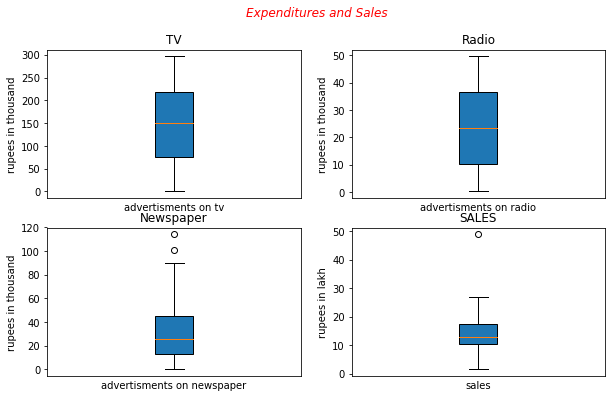

In [19]:
# TASK 2
# QUESTION A

data = [df_marketing['TV'],df_marketing['radio'],df_marketing['newspaper'],df_marketing['sales']]
f = plt.figure(figsize=(10,6))
ax1 = f.add_subplot(221)
ax1.boxplot(df_marketing['TV'],patch_artist = True)
ax2 = f.add_subplot(222)
ax2.boxplot(df_marketing['radio'],patch_artist = True)
ax3 = f.add_subplot(223)
ax3.boxplot(df_marketing['newspaper'],patch_artist = True)
ax4 = f.add_subplot(224)
ax4.boxplot(df_marketing['sales'],patch_artist = True)
ax1.set_ylabel('rupees in thousand')
ax1.set_xlabel('advertisments on tv')
ax2.set_ylabel('rupees in thousand')
ax2.set_xlabel('advertisments on radio')
ax3.set_ylabel('rupees in thousand')
ax3.set_xlabel('advertisments on newspaper')
ax4.set_ylabel('rupees in lakh')
ax4.set_xlabel('sales')
ax1.set_title('TV')
ax2.set_title('Radio')
ax3.set_title('Newspaper')
ax4.set_title('SALES')
f.suptitle('Expenditures and Sales',color = 'red',style = 'oblique')
ax1.tick_params(axis = 'x',bottom = False, labelbottom = False)
ax2.tick_params(axis = 'x',bottom = False, labelbottom = False)
ax3.tick_params(axis = 'x',bottom = False, labelbottom = False)
ax4.tick_params(axis = 'x',bottom = False, labelbottom = False)

In [20]:
# IN ABOVE BOXPLOT WE CAN SEE THAT THE EXPENDITURE ON TV ADVERTISMENT IS HIGHER THAN BOTH OF OTHER PLATFORM
# WE CAN SEE THAT THE AVERAGE SALES IS AROUND 15 TO 22 LAC IF WE SPEND A EXPENDITURE OF APPROX 150 TO 200 THOUSAND.

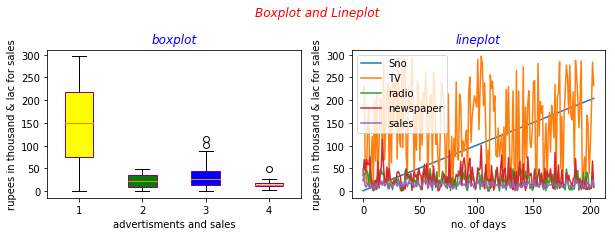

In [21]:
# QUESTION B
colors = ['yellow','green','blue','pink']
fig = plt.figure(figsize = (10,6))
fig.suptitle('Boxplot and Lineplot',color = 'Red',style = 'oblique')
ax1 = fig.add_subplot(221)
boxplot_patch = ax1.boxplot(data,patch_artist = True)
ax2= fig.add_subplot(222)
df_marketing.plot(kind = 'line',ax = ax2)
ax1.set_ylabel('rupees in thousand & lac for sales')
ax1.set_xlabel('advertisments and sales')
ax2.set_ylabel('rupees in thousand & lac for sales')
ax2.set_xlabel('no. of days')
ax1.set_title('boxplot',color = 'blue',style= 'italic')
ax2.set_title('lineplot',color = 'blue',style= 'italic')
for i in range(0,4):
    boxplot_patch['boxes'][i].set(facecolor = colors[i], 
                              edgecolor = 'purple', 
                              hatch = '' )

In [22]:
# TASK 3
# QUESTION A
# THE Independent variable in this data set are Tv ,Radio,newspaper attributes. And the sales depend on these attribute
# As we spend on advertisment of differnt platform if we spend  average amount we get sale around 20 to 30 lac.
# the model can be linear regression which can be simple or may be multiple by combining the three independent attribute

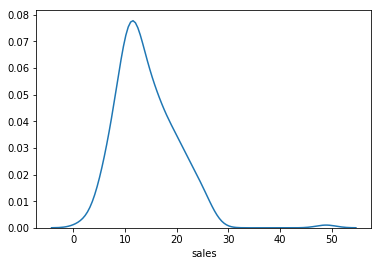

In [23]:
# QUESTION B
f,ax = plt.subplots()
sns.distplot(df_marketing['sales'],kde = True,hist = False)

Text(0.5, 1.0, 'Expenditure vs Sales')

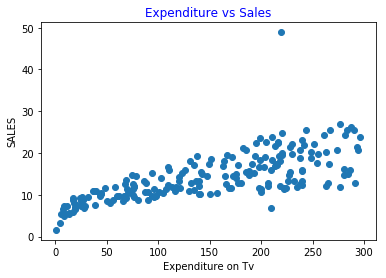

In [24]:
# TASK 4 
# QUESTION A
fig,ax = plt.subplots()
plt.scatter(x = df_marketing['TV'],y = df_marketing['sales'])
plt.xlabel('Expenditure on Tv')
plt.ylabel('SALES')
plt.title('Expenditure vs Sales',color = 'Blue')

Text(0.5, 1.0, 'Newspaper')

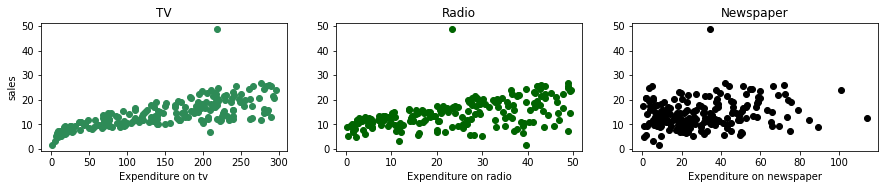

In [25]:
# QUESTION B
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(331)
ax1.scatter(x = df_marketing['TV'],y = df_marketing['sales'],color = 'seagreen',label = 'TV vs sales')
ax2 = fig.add_subplot(332)
ax2.scatter(x = df_marketing['radio'],y = df_marketing['sales'],color = 'darkgreen',label = 'radio vs sales')
ax3 = fig.add_subplot(333)
ax3.scatter(x = df_marketing['newspaper'],y = df_marketing['sales'],color = 'black',label = 'paper vs sales')
ax1.set_ylabel('sales')
ax1.set_xlabel('Expenditure on tv')
ax2.set_xlabel('Expenditure on radio')
ax3.set_xlabel('Expenditure on newspaper')
ax1.set_title('TV')
ax2.set_title('Radio')
ax3.set_title('Newspaper')

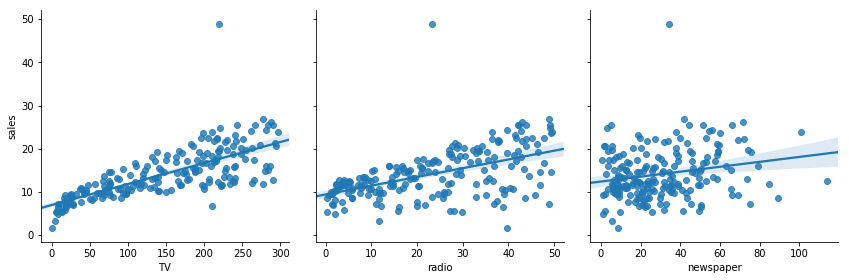

In [26]:
# QUESTION C
sns.pairplot(df_marketing,x_vars = ['TV','radio','newspaper'],
             y_vars = ['sales'],
             height = 4,kind = 'reg')

In [27]:
# TASK 5 
# QUESTION A AND QUESTION B AND C

In [28]:
total = df_marketing['TV']+df_marketing['radio']+df_marketing['newspaper']
df_marketing['total_Adv'] = total

In [29]:
x_simple = df_marketing['total_Adv'].values.reshape(-1,1)
y_simple = df_marketing['sales']

In [30]:
simple_model = linear_model.LinearRegression()

In [31]:
simple_model.fit(x_simple,y_simple)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
simple_model.score(x_simple,y_simple)             # R2 VALUE

0.6410633564014648

In [33]:
b1 = simple_model.coef_                           # SLOPE VALUE
b1

array([0.04984749])

In [34]:
b0 = simple_model.intercept_                      # INTERCEPT VALUE
b0

4.110613869188242

In [35]:
sales = b0+b1*50000           # MATHEMATICAL EQUATION
sales

array([2496.48512389])

In [36]:
new_total_Adv = np.array(50000)                       # PREDICT METHOD
new_total_Adv=new_total_Adv.reshape(-1,1)
sales1 = simple_model.predict(new_total_Adv)
sales1

array([2496.48512389])

Text(0, 0.5, 'sales(in lakh)')

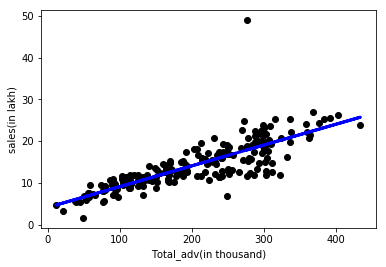

In [37]:
plt.scatter(x_simple,y_simple, color='black')                                                                   # NOT MANDATORY BUT TO PERFORM PRACTICAL
plt.plot(x_simple,simple_model.predict(x_simple),color='blue', linewidth=3)
plt.xlabel('Total_adv(in thousand)')
plt.ylabel('sales(in lakh)')

In [38]:
# TASK 6 
# QUESTION A , B , C , D

In [39]:
tv = df_marketing['TV']
radio = df_marketing['radio']
newspaper = df_marketing['newspaper']

In [40]:
x_multi = np.vstack((tv,radio,newspaper))

In [41]:
x_multi = x_multi.T

In [42]:
y_multi = df_marketing['sales']

In [43]:
multi_model  = linear_model.LinearRegression()

In [44]:
multi_model.fit(x_multi,y_multi)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
multi_model.score(x_multi,y_multi)                   # R2 VALUE

0.7547671017924948

In [46]:
b0 = multi_model.intercept_                         # INTERCEPT VALUE
b0

2.740954989435796

In [47]:
b1,b2,b3 = multi_model.coef_                        # SLOPE FOR DIFFERENT-DIFFERENT EXPENDITURE
b1,b2,b3

(0.04704579243491122, 0.18843446753174536, 0.0021862197939981065)

In [48]:
sales = b0 + b1*90000+b2*3000+b3*45000             # MATHEMATICAL EQUATION           
sales                                              # PREDICTION VALUE
# THIS PREDICT THAT WHEN WE WILL SPEND A EXPENDITURE OF 1 LAC 38 THOUSAND THEN WE WILL GET ASALE OF 4 LAC 90 THOUSAND

4900.5455674565965

In [49]:
sales = b0+b1*290000+b3*80000                      # MATHEMATICAL EQUATION
sales                                                        # PREDICTION VALUE
# IF WE SPEND MORE ON EXPENDITURE OF TV AND NEWSPAPER. THE BIGMART WILL HAVE A GOOD SALE 

13820.91834463354

In [50]:
tv_new =90000                                         # BY PREDTICTION METHOD
radio_new = 3000
newspaper_new = 45000
sales_1 = multi_model.predict([[tv_new,radio_new,newspaper_new]])
sales_1

array([4900.54556746])

In [51]:
tv_new1 = 290000
newspaper_new1 = 80000
radio_new1 = 0
sales_2 = multi_model.predict([[tv_new1,radio_new1,newspaper_new1]])
sales_2

array([13820.91834463])

In [52]:
import statsmodels.api as sm

In [53]:
# TASK 7

In [54]:
# QUESTION A
X_simple = sm.add_constant(x_simple)

In [55]:
model_simple_ols = sm.OLS(y_simple, X_simple)
results_ols_simple = model_simple_ols.fit()
results_ols_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     357.2
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           2.23e-46
Time:                        14:21:39   Log-Likelihood:                -536.53
No. Observations:                 202   AIC:                             1077.
Df Residuals:                     200   BIC:                             1084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1106      0.585      7.028      0.000       2.957       5.264
x1             0.0498      0.003     18.900      0.000       0.045       0.055
==============================================================================
Omnibus:                      190.334   Durbin-Watson:                   1.536
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8361.155
Skew:                           3.253   Prob(JB):                         0.00
Kurtosis:                      33.840   Cond. No.                         532.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_multi = sm.add_constant(x_multi)

In [57]:
model_multi_ols = sm.OLS(y_multi,X_multi)
results_ols_multi  = model_multi_ols.fit()
results_ols_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 25 Dec 2018   Prob (F-statistic):           3.63e-60
Time:                        14:21:41   Log-Likelihood:                -498.05
No. Observations:                 202   AIC:                             1004.
Df Residuals:                     198   BIC:                             1017.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7410      0.535      5.121      0.000       1.686       3.796
x1             0.0470      0.002     19.827      0.000       0.042       0.052
x2             0.1884      0.015     12.773      0.000       0.159       0.218
x3             0.0022      0.010      0.219      0.827      -0.018       0.022
==============================================================================
Omnibus:                      290.399   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44058.362
Skew:                           6.143   Prob(JB):                         0.00
Kurtosis:                      74.300   Cond. No.                         460.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# QUESTION B
predict_simple_y = simple_model.predict(x_simple)
predict_multi_y = multi_model.predict(x_multi)

In [59]:
from sklearn import metrics as met

In [60]:
simple_mse = met.mean_squared_error(y_simple,predict_simple_y)
simple_mse

11.87328145453435

In [61]:
multi_mse = met.mean_squared_error(y_multi,predict_multi_y)
multi_mse

8.112070122284843

In [62]:
# FROM ABOVE TWO VALE OF MEAN SQUARED ERROR WE CAN SEE THAT THE MULTIPLE REGRESSION MODEL IS BETTER
# AS WE CAN SEE THE DIFFERENCE IN THE VALUE IS LESS AND THAT TELLS THAT ERROR IN THE ORIGNAL VALUE WITH RESPECT TO FIT VALUE IS LESS. WHICH MEANS THE MULTI MODEL WILL GIVE GOOD ANALYIS 
# SO HENCE THE MULTIPKE REGRESSION MODEL IS BETTER THAN SIMPLE REGRESSION.